### 训练模型

In [1]:
# 准备工作， 去前面一样
import numpy as np
import pandas as pd
import os

np.random.seed(42)

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 线性回归

关于线性回归参数的求解，可以使用标准方程，直接得到参数最优解。

$$\widehat{\theta}  = (X^{T} \cdot X)^{-1}\cdot X^{T}\cdot y$$    
使用https://www.codecogs.com/latex/eqneditor.php 编辑

In [8]:
X = 2 * np.random.rand(100, 1) #产生100 * 1的范围在0--1内的随机数。
y = 4 + 3 * X + np.random.rand(100, 1)

假设要求X，Y线性回归的参数，除去噪声的影响，参数为(3, 4)

Saving figure generated_data_plot


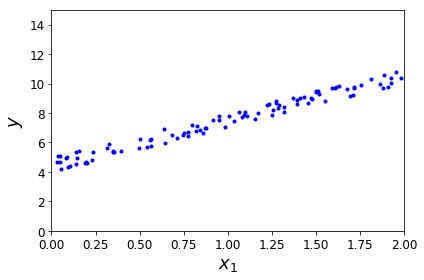

In [10]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize = 18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [13]:
# 因为有常数项的缘故， 因此添加常数的参数为1.
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_best # 可以看得结果，常数项为4左右，参数为3左右

array([[4.41604738],
       [3.10180052]])

In [19]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  #添加常数项 1
y_predict = X_new_b.dot(theta_best)
y_predict 

array([[ 4.41604738],
       [10.61964843]])

Saving figure linear_model_predictions


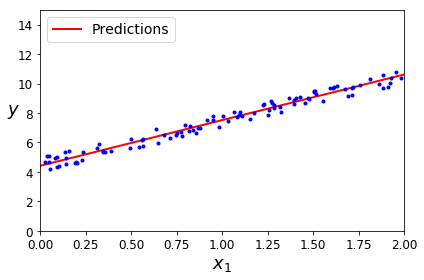

In [26]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0,  fontsize = 18)
plt.legend(loc="upper left", fontsize=14) #加上图例
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions")
plt.show()

下面使用sklearn的线性回顾模型来做预测对比

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(array([4.41604738]), array([[3.10180052]]))

可以看到结果是一样的。LinearRegression 也是基于scipy.linalg.lstsq()， 因此也可以这样求解。

In [28]:
theta_best_svd, residutals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.41604738],
       [3.10180052]])

In [30]:
np.linalg.pinv(X_b).dot(y)

array([[4.41604738],
       [3.10180052]])

不过由于计算的复杂度过高，因此在特征较大时，一般都不使用方程求解。

### 使用梯度下降求解线性回归

对于线性回归来说，需要计算损失函数的偏导数。  
然后对  ${\theta}$ 做更新。   
这里不做公式推导和介绍。

In [32]:
eta = 0.1 # 学习速率
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) #随机初始化

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [33]:
theta

array([[4.41604738],
       [3.10180052]])

In [34]:
X_new_b.dot(theta)

array([[ 4.41604738],
       [10.61964843]])

In [44]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("$\eta={}$".format(eta), fontsize=16)


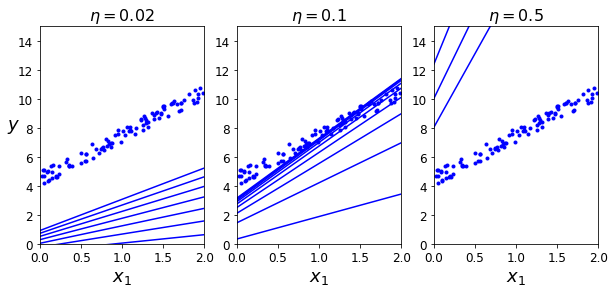

In [45]:
theta = np.random.randn(2, 1)  #随机初始化

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); 
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); 
plot_gradient_descent(theta, eta=0.5)

可以看到不同的学习率对结果的影响，过小拟合过程会很慢，过大容易过拟合。  
为了寻找合适的学习率，可以使用网格搜索。  
另外一个参数是循环次数，这里可以采用当误差小于某一个值时， 结束循环。

### 随机梯度下降